# Programing exercise 3: Coupled oscillators

Due on Monday, 12.11.2018, 14.15h

### Total: 100 points

__This exercise sheet has been solved by:__ Mathieu Kaltschmidt and Carl von Randow

## The problem

Consider two coupled harmonic oscillators described by the Hamiltonian
$$
H=H_1 + H_2 + V =\frac{1}{2m}(p_1^2 + p_2^2) + \frac{1}{2}k(x_1^2 + x_2^2) + \frac{1}{2}\lambda(x_1 - x_2)^2
$$
We want to calculate the eigenvalues and eigenfunctions of this Hamiltonian and compare the dynamics of the corresponding classical problem. This is exactly solvable by transforming into center of mass and relatice coordinates. However, we also want to treat the coupling term lambda as a perturbation and solve the problem by expanding into eigenfunctions of the 2D harmonic oscillator and solve the resulting problem, both, perturbatively for small $\lambda$ and by exact diagonalization.

In [217]:
# load standard libraries
import numpy as np   
import numpy.linalg as LA
import matplotlib.pyplot as plt 
%matplotlib inline

#for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

#Plot settings
plt.style.use('seaborn-talk')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 16
plt.rcParams["figure.figsize"][1] = 10

### Exercise 1 (20 points)

Transform the problem into center of mass and relative coordinates using
$$
x_{CM}=(x_1+x_2)/2 \\
x_{rel}=(x_1-x_2)
$$ 
Write a function that returns the classical trajectory for initial conditions $\{x_1(t=0)=x_{10}, x_2(t=0)=x_{20}, \dot{x}_1(t=0)=v_{10}, \dot{x}_2(t=0)=v_{20}\}$.

Make a density plot of the potential and plot the classical trajectory for $m=k=1,\lambda=0.2$ and ${x_{10}=1,x_{20}=v_{10}=v_{20}=0}$ up to a time $t_f$ into it. Also, plot the positions of the two particles as a function of time. Observe the beating between center-of-mass and relative frequency.


Very instructive 2D plotting tips:
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

In [232]:
#Defining spatial grid structure
x1=np.linspace(-2,2,100)
x2=np.linspace(-2,2,100)

#some parameters
(m, k, const)  = (1, 1, 0.2)

#initial conditions
(x10, v10) = (1, 0)
(x20, v20) = (0, 0)

In [233]:
#Implementing the solution for the trajectories
def trajectories(x1,v1,x2,v2,t):
    x_rel = (x1-x2)
    omega_rel = np.sqrt((k+2*const)/(2*m)) 
    omega_cm = np.sqrt(k/(2*m))
    
    #defining the known prefactors
    A= x_rel
    B=(v1-v2)/ omega_rel
    
    C= x1+x2 
    D=(v1+v2)/omega_cm
    
    x1=(C*np.cos(omega_cm*t)+D*np.sin(omega_cm*t)+(A*np.cos(omega_rel*t)+B*np.sin(omega_rel*t))) / 2
    x2=(C*np.cos(omega_cm*t)+D*np.sin(omega_cm*t)-(A*np.cos(omega_rel*t)+B*np.sin(omega_rel*t)))/ 2

    return x1, x2

In [234]:
#Defining the harmonic oscillator potential 
def oscillator(x1,x2):
    return 0.5*(x1**2 + x2**2)

#Defining the given coupling potential 
def coupling(x1,x2,const):
    return 0.5*const*(x1-x2)**2

#Defining the total potential (oscillator + coupling) 
def V_total(x1,x2,const):
    return oscillator(x1,x2) + coupling(x1,x2,const)


#Creating the grid structure + density plots
def density_plot(x1,x2,potential,const):
    x,y = np.meshgrid(x1,x2)
    z = potential(x,y,const)
    plt.contour(x,y,z,20,cmap = 'plasma')
    plt.colorbar()

In [235]:
#Calcultating the trajectory
time = np.linspace(0,40,1000)
particle1, particle2 = trajectories(x10,v10,x20,v20,time)

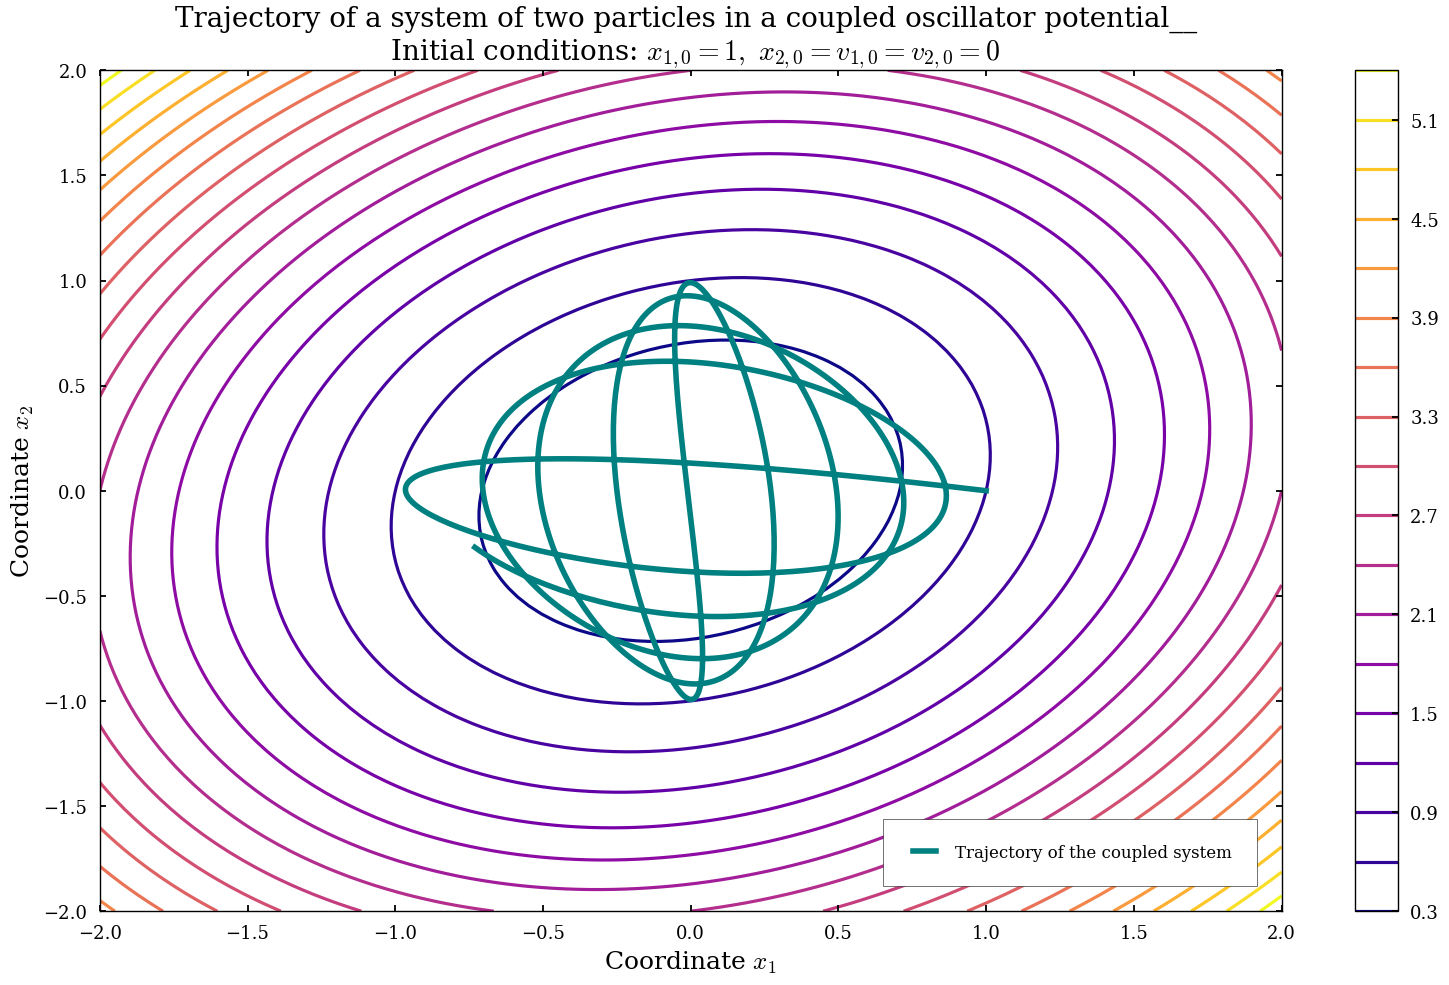

In [243]:
#Plotting the trajectories in the total potential
plt.plot(particle1, particle2, color='teal', linewidth = 4, label = 'Trajectory of the coupled system')
density_plot(x1,x2,V_total,const)
plt.title('Trajectory of a system of two particles in a coupled oscillator potential__ \n Initial conditions: $x_{1,0} = 1, \ x_{2,0} = v_{1,0} = v_{2,0} = 0$', size = 20)
plt.xlabel('Coordinate $x_1$', size = 18)
plt.ylabel('Coordinate $x_2$', size = 18)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='lower right')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/trajectory_in_potential.pdf', format='PDF')

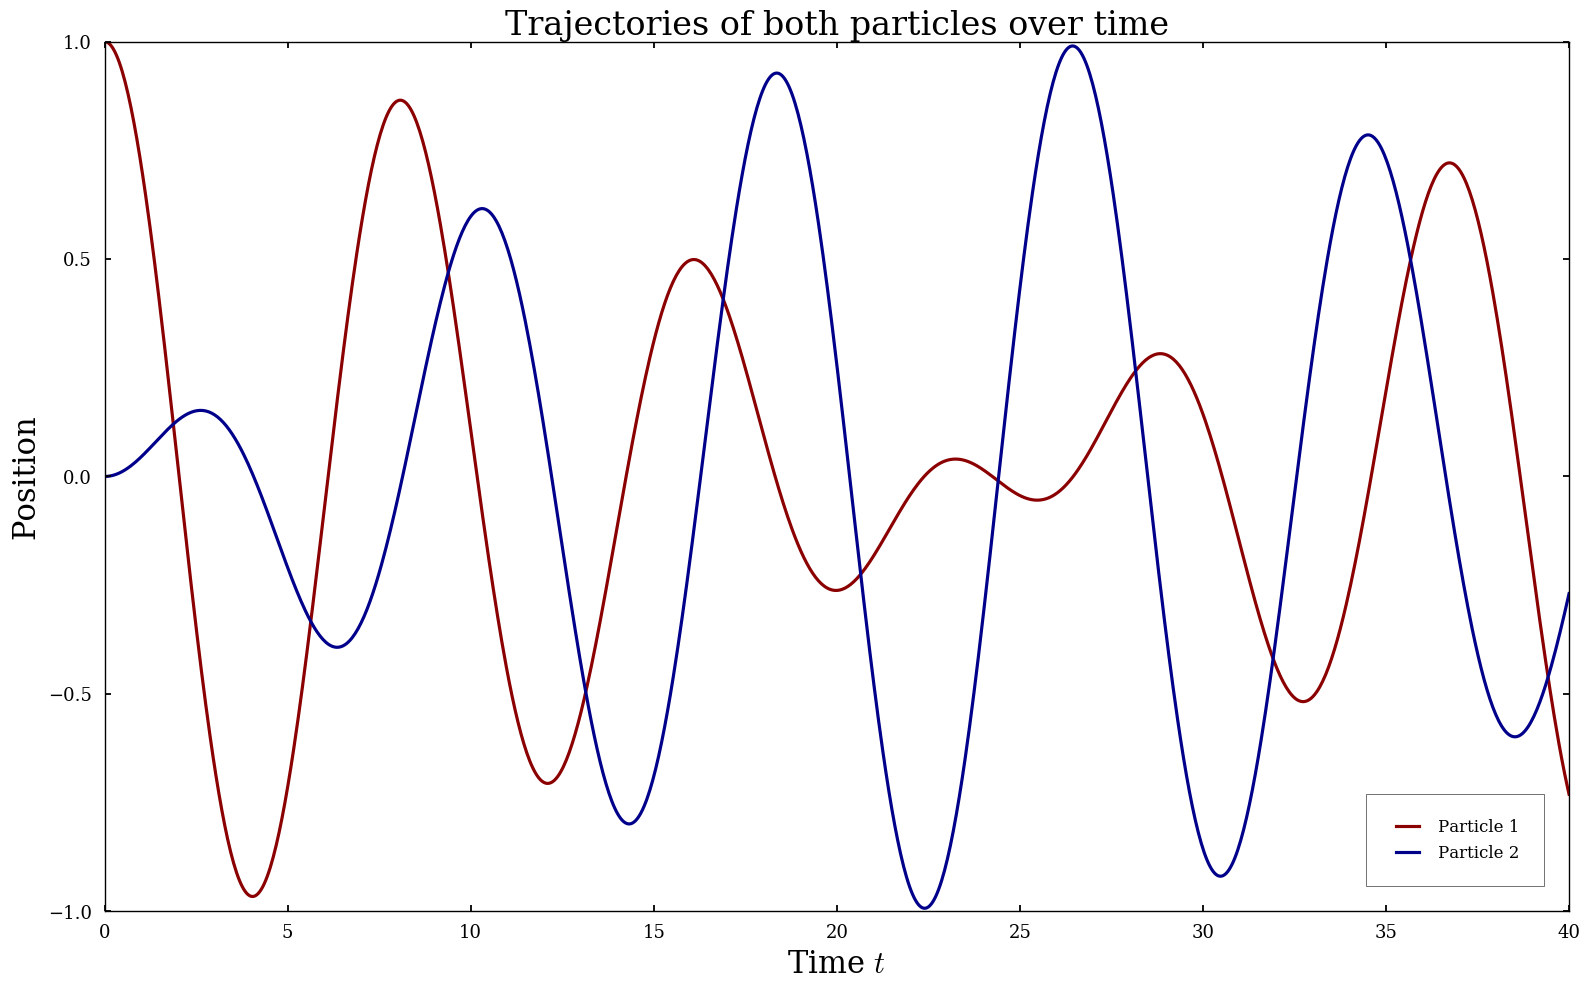

In [237]:
#Plotting both trajectories as a function of time
plt.plot(time, particle1, label="Particle 1", color = 'darkred')
plt.plot(time ,particle2, label="Particle 2", color = 'darkblue')
plt.ylabel("Position", size = 22)
plt.xlabel("Time $t$", size = 22)
plt.title("Trajectories of both particles over time", size = 24)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the result
plt.tight_layout()
plt.savefig('Plots/trajectories.pdf', format='PDF')

### Exercise 2 (10 points)

What are the exact quantum mechanical eigenenergies? 
Calculate the ground state energy perturbatively to second order in $\lambda$. Use the decomposition into ladder operators
$$
x/x_{HO} = (a^\dagger + a)/\sqrt{2}
$$
Show that the same result is obtained by Taylor expanding the exact ground state energy $E_0 = \hbar\omega/2(1+\sqrt{1+2\lambda/k}) $ to second order in $\lambda/k$.

Plot the exact and perturbative ground state energy as a function of $\lambda/k$.

### Exercise 3 (40 points)

Expand the Hamiltonian in the eigenbasis of the 2D harminic oscillators (use the same cutoff $N_1=N_2=N_{max}$ for both oscillator modes 1 and 2). 
For this, one can expand the perturbation term $\frac{1}{2}\lambda(x_1 - x_2)^2$ into ladder operators and then apply it to the unperturbed basis states.
How many non-zero elements will there be at most in each row? 

There are many ways of building the Hamiltonian matrix in the chosen basis. First, make sure you understand what the basis states are and how one would order them in a reasonable way.
A failsafe way to build up the Hamiltonian matrix is to iterate over all states of the bare basis and determine the matrix-elments it couples to. Another, arguably more elegant, way is to build the matrix representing the anihilation operator on the Hilbert space of one of the oscillators. The creation operator is then simply the transpose of that and the position operator can be built by adding the two. We have a 2D problem so we work in a Hilbert space that is a tensor product of the two Hilbert spaces of the oscillators. Thus, to represent the position operator $\hat{x}_1$ acting on oscillator 1 in the full Hilbert space  we have to use $\hat{x}_1 \otimes \mathbf{1}$, where $\mathbf{1}$ is the identity acting on the second subspace (see the numpy "eye" function). This can be achieved by using the Kronecker product. For multiplying or squaring operators you can use the numpy dot product function.
The second method might be less efficient if you want to exploit the sparsity of the problem but it is very handy since it requires only to build one operator explicitly and the rest is matrix algebra (or two if you use different basis sizes for the two oscillators).

Diagonalize the Hamiltonian and check your result by comparing the ground state energy to the exact result. How small can you make the basis such that the ground sate energy still converged? (You should find that $N_1=N_2=5$, i.e. 25 basis states, is sufficient to get the ground state with good precision up to $\lambda=2$. Note that using a simple spatial grid to represent the wave function we would need much larger basis sizes!) Also look at some excited states, at least the lowest 6, make sure that your diagonalization results agree with the exact one, and understand the structure of the spectrum.

Bonus (not graded): This is of course still a problem that can be solved analytically, and thus we are complicating it by doing the basis set expansion. However, one could now use this method to apply it to non-integrable cases like a quartic (non-linear) coupling or even the quantum version of the Henon-Heiles problem, which does not separate and is classically chaotoic!
If you want to go beyond, try other potentials!

### Exercise 4 (30 points)

Calculate the time evolution for different initial conditions: 1) oscillator 1 in the first excited state, oscillator two in its ground state $|0\rangle$; 2) oscillator 1 in $|\psi_0\rangle = (|0\rangle+|1\rangle)/\sqrt(2)$, oscillator two in state $|0\rangle$;  3) oscillator 1 in a coherent state (e.g. with $\langle n \rangle = |\alpha|^2 = 2$) and oscillator 2 in $|0\rangle$. Example parameters: $\lambda=0.2$, $N_1=N_2=10$, $t_f = 40$.

Monitor the dynamics by calculating $\langle x_1 \rangle$ and $\langle x_2 \rangle$, the energy expectation value of each oscillator, as well as the probabilities for each oscillator to be in state $|n\rangle$. Compare your observations to the classical expectation: propagate a classical particle with $x_{i0}=\langle x_i(t=0) \rangle$ and $p_{i0}=\langle p_i(t=0) \rangle$. Describe and interpret your observations.

Bonus (not graded): Represent the wave function on a 2D spatial grid using the exact harmonic oscillator eigenfunctions. Animate the time-dependence of the wave packet.